# When to start renting in Chicago?

This is a brief walkthrough of EDA and how you do not have to go through fancy algorithms to gain big insights.

Long story short, it's best to look for an apartment around November.

We look at the average median monnthly rentals for 1 bedroom apartments in popular Chicago neighborhoods across the years. I was first inspired to dive into this, because I am new to Chicago and had heard that renting a place later in the year would be more cost-effective. However, I wanted to know by how much. 

In [31]:
%%HTML
<div class='tableauPlaceholder' id='viz1539840508041' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;1B&#47;1BRChicagoRent&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='1BRChicagoRent&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;1B&#47;1BRChicagoRent&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1539840508041');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


## Effects and Causes

There is on average, a 10% difference in price from high-peak to low-peak season. That means, in some neighborhoods, you could be spending an extra $3,000 a year just based on the time you decided to rent. 

Now, several causes of this seasonality of renters can be attributed to the physical seasonality. By November, winter is coming around and not many people are wanting to be out in the cold moving in to a new place. Another attributing factor can be because of the seasonality of schools. College students are in transition between school years and will tend to be looking for places in July and August.

## Assumptions

We assume that there are the same number of available options across each month. 

We assume the same quality of property across the board. Higher-value properties may be taken out of the market sooner.

## Below we have the full thought process behind this project

In [32]:
import pandas as pd
df_raw = pd.read_csv("Neighborhood_MedianRentalPrice_1Bedroom.csv")
df_raw.head()

#source: https://www.zillow.com/research/data/#other-metrics

,RegionName,City,State,Metro,CountyName,SizeRank,2010-05,2010-06,2010-07,2010-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,Northeast Dallas,Dallas,TX,"Dallas, TX",Dallas,1,NaN,NaN,NaN,NaN,...,1195.0,1190.0,1195.0,1200.0,1085.0,1078.0,1075.0,1050.0,1040.0,995.0
1,Paradise,Las Vegas,NV,"Las Vegas, NV",Clark,2,NaN,NaN,NaN,NaN,...,821.0,725.0,740.0,850.0,940.0,948.0,915.0,974.0,949.5,961.0
2,Maryvale,Phoenix,AZ,"Phoenix, AZ",Maricopa,3,NaN,NaN,NaN,NaN,...,692.0,699.0,690.5,692.0,699.0,724.0,724.0,707.0,715.0,724.0
3,Upper West Side,New York,NY,"New York, NY",New York,4,NaN,NaN,NaN,NaN,...,3197.0,3203.0,3200.0,3200.0,3175.0,3195.0,3252.0,3237.0,3200.0,3217.0
4,Sherman Oaks,Los Angeles,CA,"Los Angeles, CA",Los Angeles,5,NaN,NaN,NaN,NaN,...,1770.0,1762.0,1770.0,1749.5,1725.0,1750.0,1795.0,1795.0,1750.0,1795.0


In [33]:
#I just want to see rates in Chicago, Illinois
df_chi = df_raw[df_raw.City == "Chicago"]
df_chi.head()

#So the way the data is set up... I want to get each RegionName as the column and the time series as the rows

,RegionName,City,State,Metro,CountyName,SizeRank,2010-05,2010-06,2010-07,2010-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
43,Logan Square,Chicago,IL,"Chicago, IL",Cook,44,NaN,NaN,NaN,NaN,...,1295.0,1350.0,1312.5,1295.0,1395.0,1412.5,1400.0,1395.0,1375.0,1350.0
64,West Rogers Park,Chicago,IL,"Chicago, IL",Cook,65,NaN,NaN,NaN,NaN,...,995.0,995.0,995.0,995.0,1020.0,1050.0,1050.0,1050.0,1000.0,1050.0
76,Albany Park,Chicago,IL,"Chicago, IL",Cook,77,NaN,NaN,NaN,NaN,...,1050.0,1025.0,1025.0,1067.5,1075.0,1075.0,1050.0,1100.0,1115.0,1100.0
81,Rogers Park,Chicago,IL,"Chicago, IL",Cook,82,NaN,NaN,NaN,NaN,...,982.5,975.0,995.0,995.0,1005.0,1015.0,1000.0,1000.0,1000.0,1000.0
82,South Austin,Chicago,IL,"Chicago, IL",Cook,83,NaN,NaN,NaN,NaN,...,750.0,750.0,737.5,800.0,800.0,789.5,800.0,852.5,825.0,750.0


In [34]:
df = df_chi.T
#df.columns=['Time', 'Team', 'Score']
df = df.iloc[6:,:]
df.columns = df_chi['RegionName']
df.dropna(axis=0, how='all')
df.head()

RegionName,Logan Square,West Rogers Park,Albany Park,Rogers Park,South Austin,Gresham,Lake View,South Shore,Lake View East,North Center,...,Old Town Triangle,East Chatham,West Loop Gate,New Eastside,Lincoln Square,Fulton River District,Goose Island,Wrigleyville,Dearborn Park,South East Ravenswood
2010-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


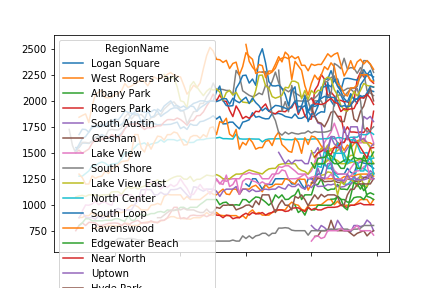

In [35]:
%matplotlib notebook
lines = df.plot.line()
lines

In [36]:
#After viewing this enormous line chart, we could take a few different approaches
#1. Look at most popular neighborhoods
#2. Filter by pricepoint, safety, etc.
#But what I'm actually going to do is export to tableau

df.to_csv("chi_1bedroom.csv")